# Analyse vidéo d'un match d'ultimate frisbee

# Récupération et traitement des données vidéo

## Installation des Algorithmes de détection et de tracking

In [3]:
# On importe le code de 7-Stats forké du GitHub https://github.com/PradeepSinghMakwana/sheep_tracking.git qui utilise Detectron2 (algo de détection) et DeepSort (algo de tracking)
!git clone https://github.com/7-Stats/sheep_tracking.git
!mv sheep_tracking/* ./
!rm -r sheep_tracking

Cloning into 'sheep_tracking'...
remote: Enumerating objects: 79, done.
remote: Counting objects: 100% (79/79), done.
remote: Compressing objects: 100% (78/78), done.
remote: Total 79 (delta 43), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (79/79), done.


In [4]:
# install dependencies: (use cu100 because colab is on CUDA 10.0)
!pip install detectron2 -f https://dl.fbaipublicfiles.com/detectron2/wheels/cu100/index.html

# On relance 'PIL' (pour utiliser la nouvelle version installée et éviter de manuellement relancer le 'runtime')
%reload_ext PIL

# On installe Detectron2
!git clone https://github.com/facebookresearch/detectron2.git
!pip install 'git+https://github.com/facebookresearch/detectron2.git'

# On installe Deepsort
!git clone https://github.com/abhyantrika/nanonets_object_tracking.git

Looking in links: https://dl.fbaipublicfiles.com/detectron2/wheels/cu100/index.html
     |████████████████████████████████| 6.7MB 832kB/s 
     |████████████████████████████████| 2.2MB 8.9MB/s 
     |████████████████████████████████| 276kB 34.5MB/s 
  Created wheel for fvcore: filename=fvcore-0.1.2.post20201218-cp36-none-any.whl size=40701 sha256=bd472a05c06c1bccdd0838c8e88c740a12f9771379ea36a95287fb03ca50e56c
  Stored in directory: /root/.cache/pip/wheels/b5/83/3f/e74a72d264351b5ada512da845a5c6abb81a34f6333c3a54ce
  Created wheel for pyyaml: filename=PyYAML-5.3.1-cp36-cp36m-linux_x86_64.whl size=44621 sha256=726f7e6bf901a89c5adb7b090d41ecd7e42857592f9d672d019402c7ffdf8217
  Stored in directory: /root/.cache/pip/wheels/a7/c1/ea/cf5bd31012e735dc1dfea3131a2d5eae7978b251083d6247bd
  Created wheel for iopath: filename=iopath-0.1.2-cp36-none-any.whl size=10508 sha256=eb6e01defb7e422a51ed641d492ac9e3933cb2903d55d743ec82ac6e94dc9d8d
  Stored in directory: /root/.cache/pip/wheels/9e/01/e4/1b68

Cloning into 'detectron2'...
remote: Enumerating objects: 26, done.
remote: Counting objects: 100% (26/26), done.
remote: Compressing objects: 100% (23/23), done.
remote: Total 9623 (delta 4), reused 9 (delta 3), pack-reused 9597
Receiving objects: 100% (9623/9623), 3.85 MiB | 15.54 MiB/s, done.
Resolving deltas: 100% (7055/7055), done.
  Cloning https://github.com/facebookresearch/detectron2.git to /tmp/pip-req-build-g19bv4hm
  Running command git clone -q https://github.com/facebookresearch/detectron2.git /tmp/pip-req-build-g19bv4hm
  Created wheel for detectron2: filename=detectron2-0.3-cp36-cp36m-linux_x86_64.whl size=5251389 sha256=0a4975a825d62fbb7a21211ab669e26fd57d5f3c2578913239300f0a91b18397
  Stored in directory: /tmp/pip-ephem-wheel-cache-0y13m9n6/wheels/33/ac/bb/5ef90585c21c67e2f0b6aae55ec6b43017ad57af33d5f4c339
Successfully built detectron2
  Found existing installation: detectron2 0.2.1+cu100
    Uninstalling detectron2-0.2.1+cu100:
      Successfully uninstalled detectro

## Téléchargement de la vidéo input

In [5]:
# On importe la vidéo du match
!pip install youtube-dl

#!youtube-dl https://www.youtube.com/watch?v=tvET2vbVLXw -f 137 -o ultimate-mini-map-game-input-low-quality.mp4 # low quality
!youtube-dl https://www.youtube.com/watch?v=gDaEzZ0HTbU -f 137 -o ultimate-mini-map-game-input-high-quality.mp4 # high quality

     |████████████████████████████████| 1.9MB 5.3MB/s 
[youtube] gDaEzZ0HTbU: Downloading webpage
[youtube] gDaEzZ0HTbU: Downloading MPD manifest
[dashsegments] Total fragments: 8
[download] Destination: ultimate-mini-map-game-input-high-quality.mp4
[download] 100% of 7.63MiB in 00:01


## Création du fichier CSV de Tracking Data

In [ ]:
# Pour obtenir le fichier CSV, importer pandas et ajouter ces bouts de code dans le fichier "test_on_video.py"

### Ajout Daz ligne 171
#df = pd.DataFrame(columns=['Frame', 'ID', 'X1', 'Y1', 'X2', 'Y2'])
### Fin Ajout Daz

### Ajout Daz ligne 219
#df = df.append(pd.DataFrame([[frame_id, id_num, bbox[0], bbox[1], bbox[2], bbox[3]]], columns=['Frame', 'ID', 'X1', 'Y1', 'X2', 'Y2']))
### Fin Ajout Daz

### Ajout Daz ligne 237
#df.to_csv("playerPositions.csv", sep = ",")
### Fin Ajout Daz

# On analyse la vidéo
!python sheepFinder.py --config-file detectron2/configs/COCO-Detection/faster_rcnn_R_50_FPN_3x.yaml --video-input ultimate-mini-map-game-input-high-quality.mp4 --confidence-threshold 0.7 --opts MODEL.WEIGHTS detectron2://COCO-Detection/faster_rcnn_R_50_FPN_3x/137849458/model_final_280758.pkl

# On produit la vidéo output et le fichier CSV du tracking des positions de chaque joueur
!python test_on_video.py --video-input ultimate-mini-map-game-input-high-quality.mp4 --video-output vdo-ultimate-high-quality

  Using cached https://files.pythonhosted.org/packages/4c/18/3cb351ff60d7b53cb8d5a2f27f3de0dc28b145566dbcf3b790774ec5cc50/youtube_dl-2020.12.2-py2.py3-none-any.whl
[youtube] gDaEzZ0HTbU: Downloading webpage
[youtube] gDaEzZ0HTbU: Downloading MPD manifest
[dashsegments] Total fragments: 8
[download] Destination: ultimate-mini-map-game-input-high-quality.mp4
[download] 100% of 7.63MiB in 00:05
[12/02 09:10:50 detectron2]: Arguments: Namespace(confidence_threshold=0.7, config_file='detectron2/configs/COCO-Detection/faster_rcnn_R_50_FPN_3x.yaml', opts=['MODEL.WEIGHTS', 'detectron2://COCO-Detection/faster_rcnn_R_50_FPN_3x/137849458/model_final_280758.pkl'], output_text_file='nanonets_object_tracking/det/det_demo.txt', parallel=False, video_input='ultimate-mini-map-game-input-high-quality.mp4')
[12/02 09:10:57 fvcore.common.checkpoint]: Loading checkpoint from detectron2://COCO-Detection/faster_rcnn_R_50_FPN_3x/137849458/model_final_280758.pkl
[12/02 09:10:57 fvcore.common.download]: Downloa

# Traitement du fichier de Tracking Data (positions de chaque joueur à chaque instant)

## Import bibliothèques Python et création du DataFrame avec les données de position brutes (pixels)

In [ ]:
# On importe les bibliothèques utilisées pour cette tâche
import pandas as pd
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
from shapely.geometry import Point, Polygon
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import scipy.signal as signal

!pip install ffmpeg-python

In [ ]:
# On transforme le fichier CSV input en DataFrame
playerPositions = pd.read_csv("playerPositions.csv")

# On définit un tableau croisé dynamique à partir des positions de chaque ID reconnue par l'algorithme pour chaque frame
playerPositionsPivot = pd.pivot_table(playerPositions, index = ["Frame", "ID"], values = ["X1", "X2", "Y1", "Y2"])

# Test : (X1, Y1) et (X2, Y2) sont les coordonnées du rectangle de détection (box) entouré chaque joueur détecté
#
# x1,y1 ---- x2,y1
#   |          |
#   |    ID    |
#   |          |
# x1,y2 ---- x2,y2
#
playerPositionsPivot

X1           X2          Y1          Y2
Frame ID                                                   
3     1    1177.489694  1271.701357  700.036469  891.067219
      2    1434.066257  1567.697313  699.638896  897.247764
      3     419.651234   443.938931  480.993533  550.704827
      4    1423.979684  1438.967613  508.790675  558.443660
      5    1547.313709  1581.666146  537.659973  609.414526
...                ...          ...         ...         ...
877   190  1404.269151  1428.945308  502.741725  570.361417
      195  1311.693329  1356.689521  546.084501  647.227917
      202  1367.179072  1391.987608  495.779039  567.038125
      233   166.548616   237.730774  644.953842  946.813351
      235  1502.846304  1524.664361  515.925187  573.840409

[15762 rows x 4 columns]

## Délimitation du terrain "réel" et définition du terrain 2D pour la projection

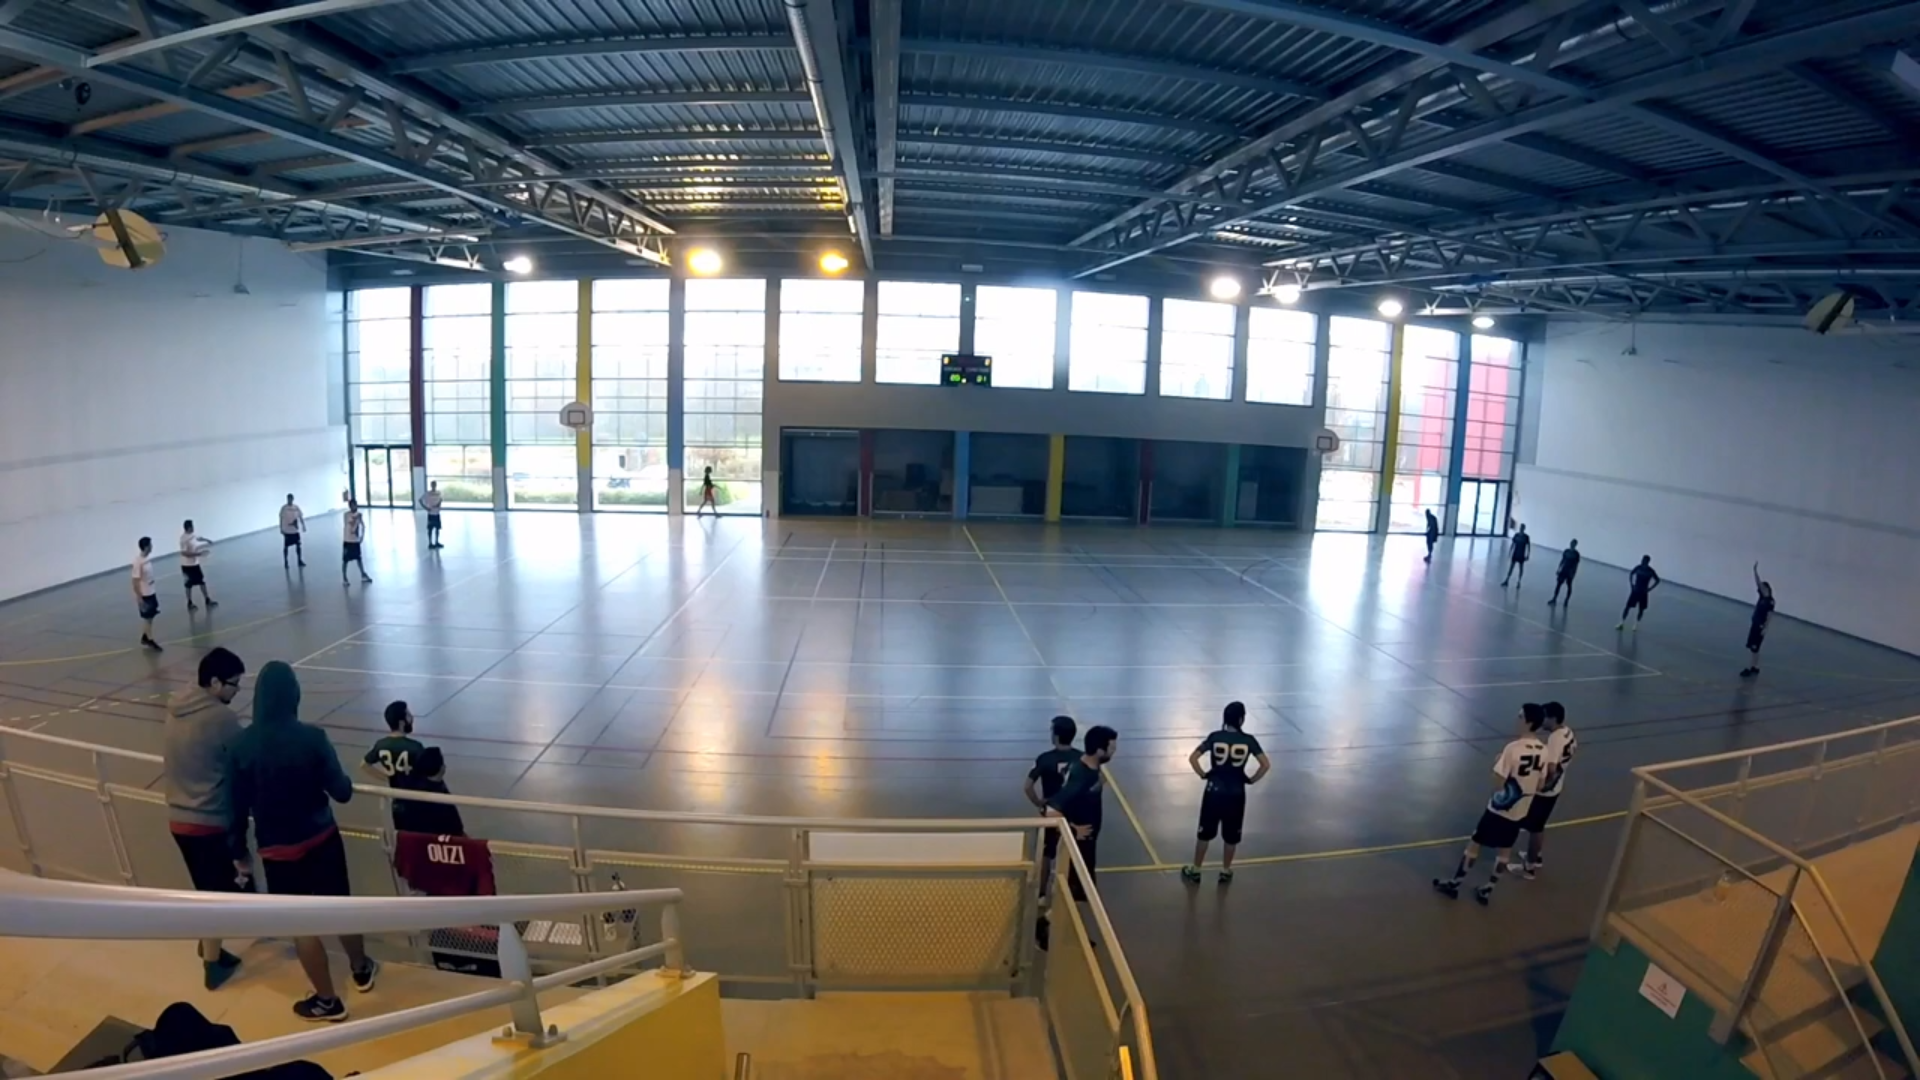

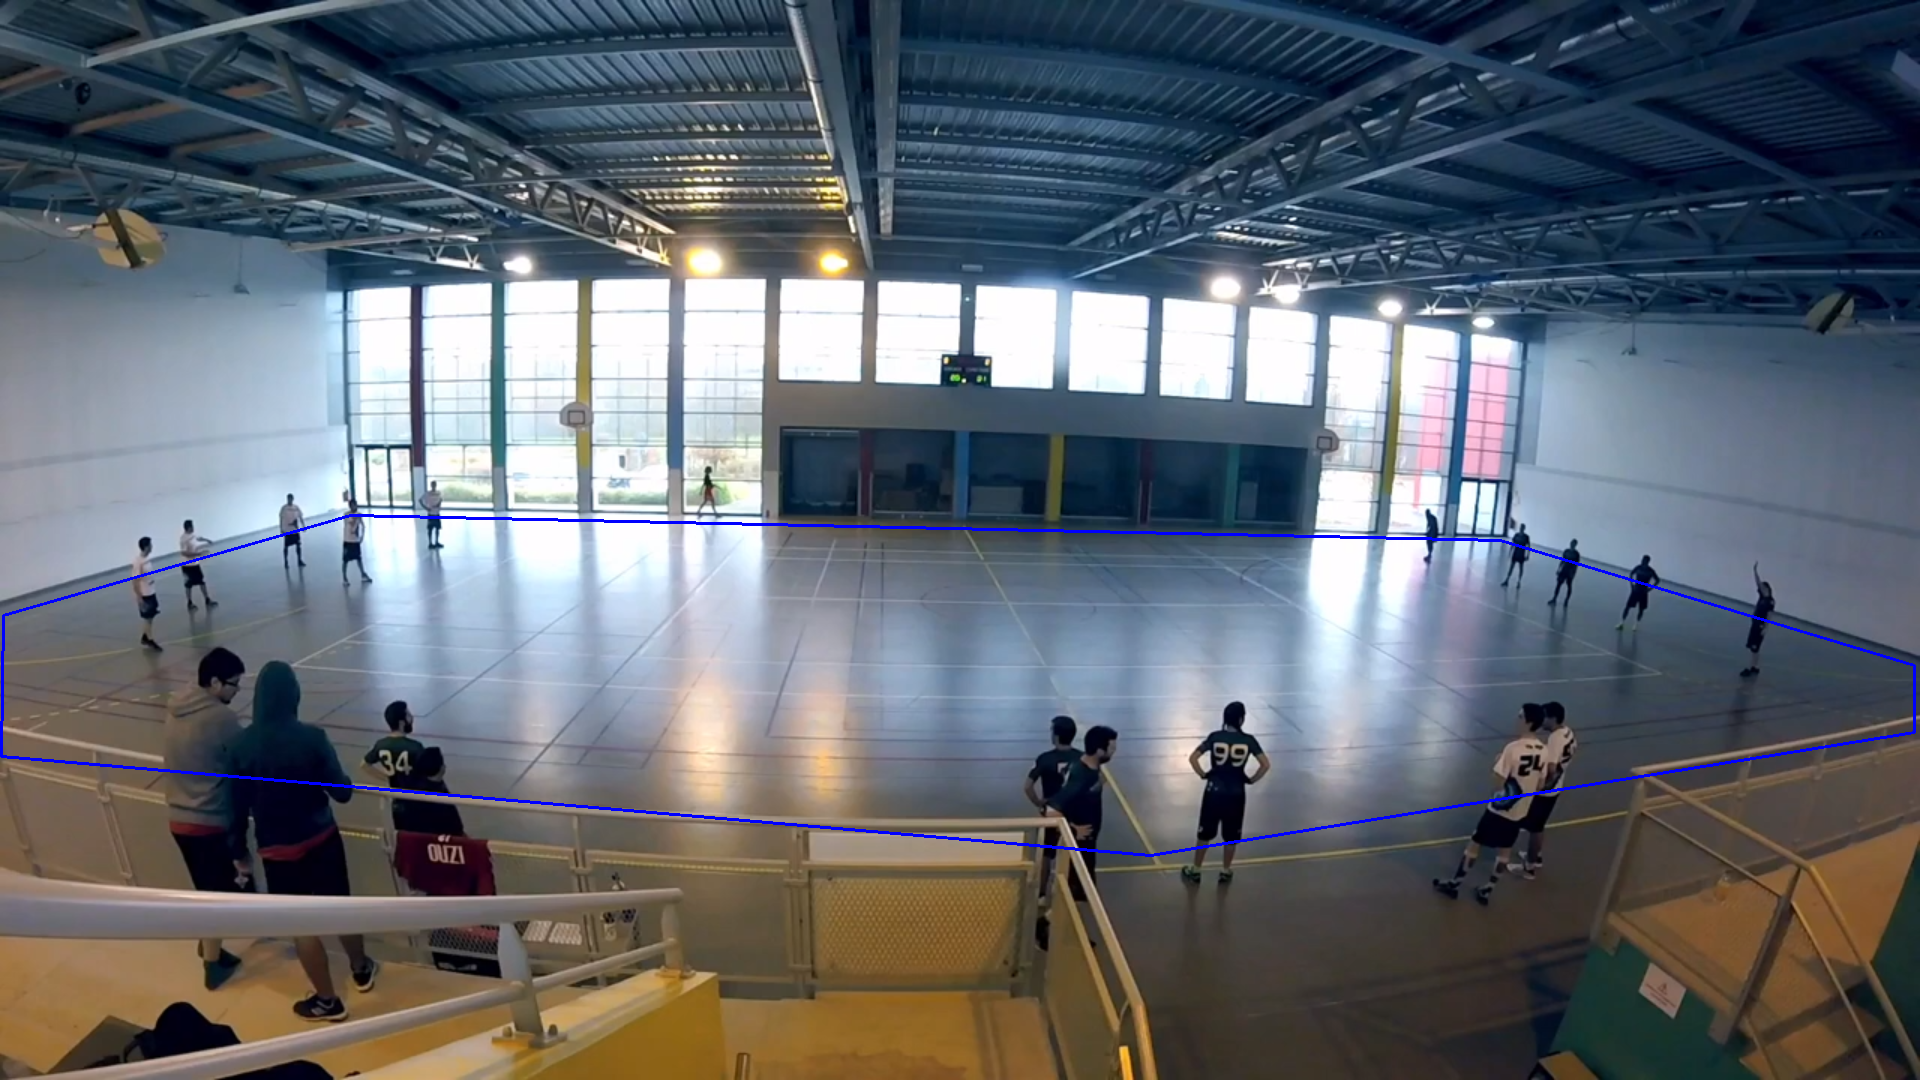

In [ ]:
# Les coordonnées des joueurs correspondant aux pixels de l'image, on va faire une transformation homographe pour les "projeter" sur le terrain 2D dont on importe l'image
im = cv2.imread("./input.jpg")

# On montre l'image pour calculer les coordonnées du polygone approximant au mieux le terrain (ici un heptagone)
cv2_imshow(im)

# On définit les sommets du polygone correspondant au terrain de gymnase CR2IF Indoor 2019/2020 (en partant du bas à gauche et en tournant dans le sens trigonométrique)
src_pts = np.array([[1, 756], [1150, 855], [1914, 732], [1914, 665], [1500, 540], [350, 515], [3, 615]])      

# Enfin on trace le polygone délimitant le terrain sur l'image (cette procédure devra être faite pour chaque terrain différent)
im_poly = im.copy()

# cv2.fillPoly(img_src, [src_pts], 255)
cv2.polylines(im_poly, [src_pts], isClosed = True, color = [255, 0, 0], thickness = 2)

# On montre le résultat final pour s'assurer que le polygone "colle" au mieux aux lignes extérieures du terrain
cv2_imshow(im_poly)

--2020-12-07 16:43:45--  https://thesportsedu.com/wp-content/uploads/2020/09/ultimate-court.001.jpeg
Resolving thesportsedu.com (thesportsedu.com)... 35.214.168.205
Connecting to thesportsedu.com (thesportsedu.com)|35.214.168.205|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 213545 (209K) [image/jpeg]
Saving to: ‘outdoorCourt.jpg’

outdoorCourt.jpg    100%[===================>] 208.54K  --.-KB/s    in 0.005s  

2020-12-07 16:43:45 (42.5 MB/s) - ‘outdoorCourt.jpg’ saved [213545/213545]



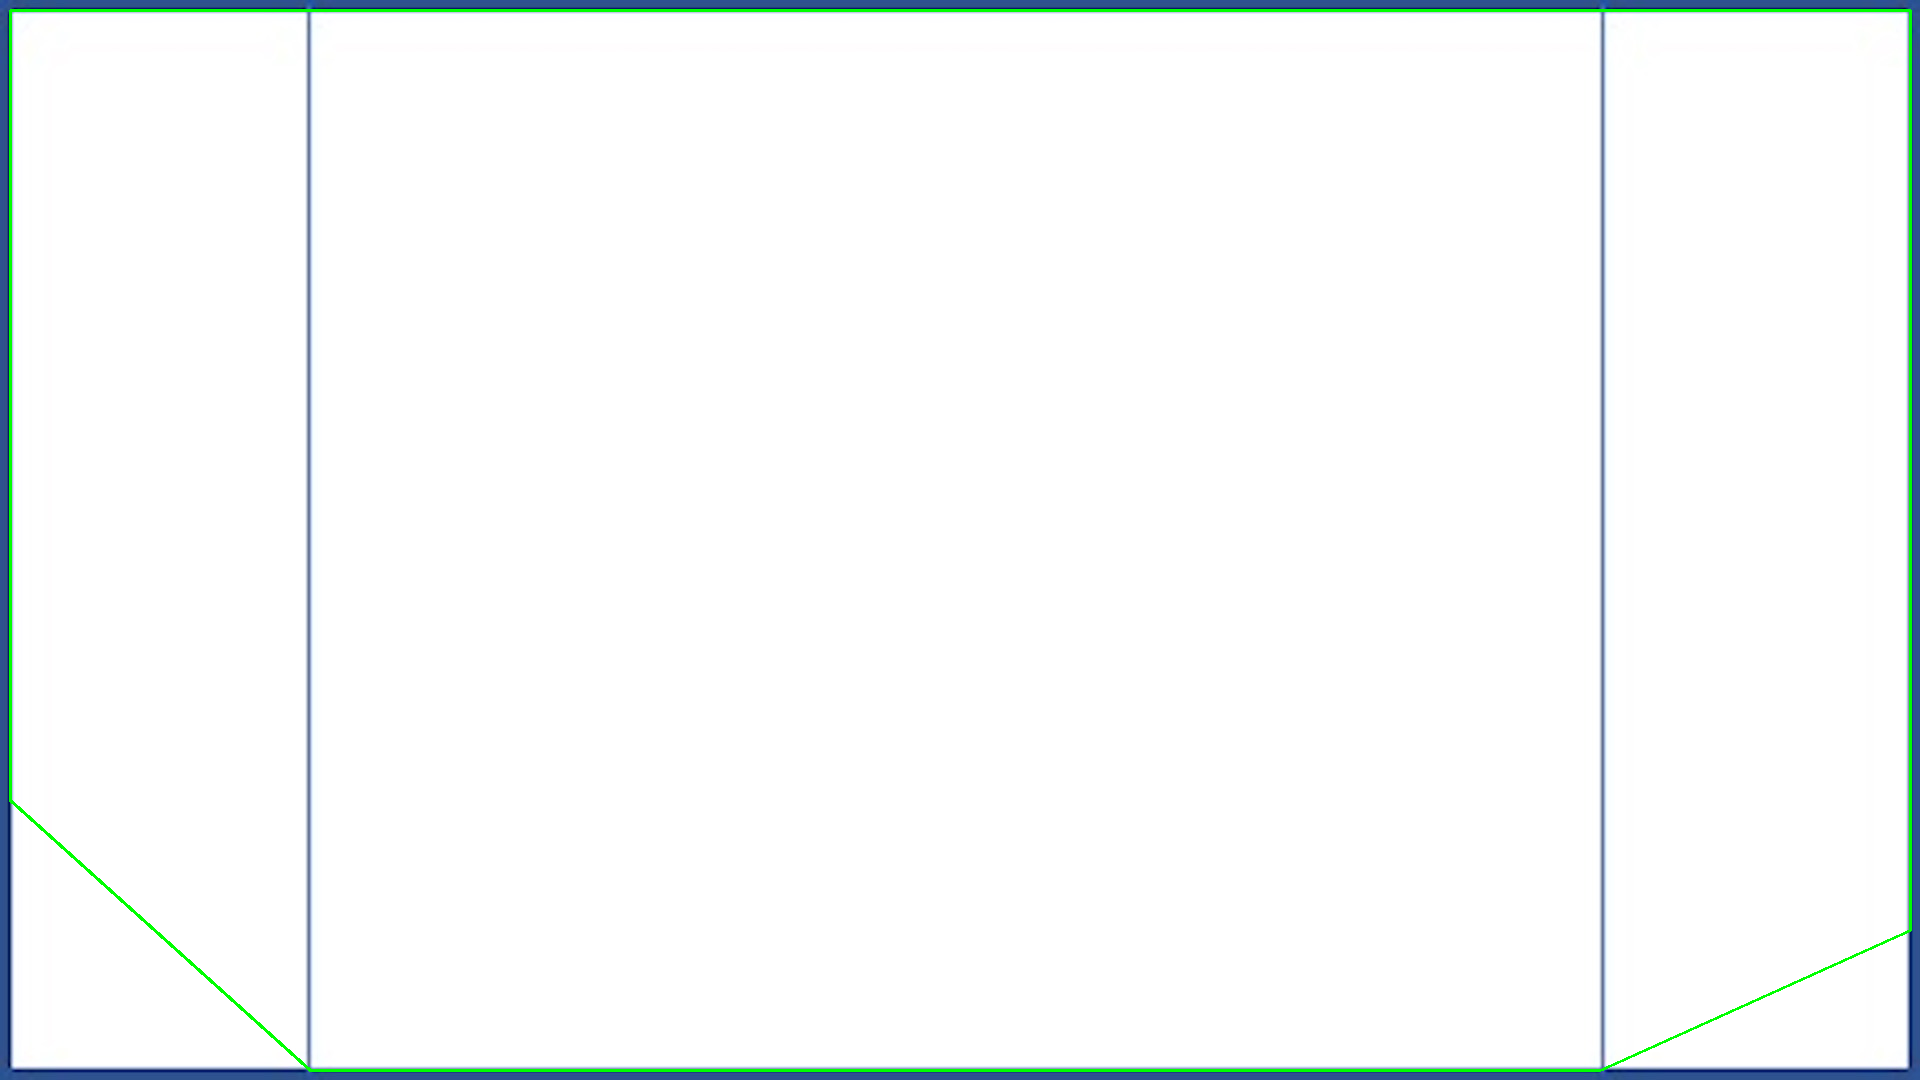

In [ ]:
# On télécharge l'image du terrain sur lequel on va projeter la position des joueurs
!wget https://thesportsedu.com/wp-content/uploads/2020/09/ultimate-court.001.jpeg -O outdoorCourt.jpg

# On enregistre l'image
img_dst = cv2.imread('./indoorCourt.jpg')

# On décrit les coordonnées sur ce terrain correspndant aux coordonnées src_pts 
#outdoor_dst_pts = np.array([[520, 800], [990, 800], [1460, 800], [1720, 730], [1720, 270], [260, 270], [260, 684]])
indoor_dst_pts = np.array([[310, 1070], [950, 1070], [1600, 1070], [1910, 930], [1910, 10], [10, 10], [10, 800]])   

# On trace les lignes correspondant au contour visible à la caméra
cv2.polylines(img_dst, [indoor_dst_pts], isClosed = True, color = [0, 255, 0], thickness = 2)

# On visualise le résultat
cv2_imshow(img_dst)

## Définition des joueurs sur le terrain et projection sur le terrain 2D

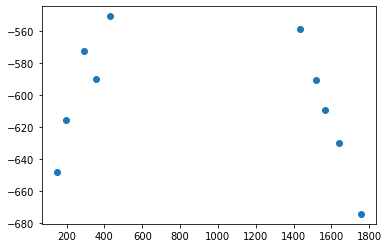

In [ ]:
# On définit la fonction qui va garder uniquement les joueurs détectés à l'intérieur des limitesdu terrain

def keepPlayersInsideCourt(df, src_pts):
  
  # On définit le polygone à partir des "sommets" du terrain réel
  court = Polygon(src_pts)

  # On définit la projection du centre de gravité de chaque joueur au sol (moyenne de X1 et X2)
  df["XC"] = (df["X1"] + df["X2"]) / 2
  
  # On itère sur les lignes du DataFrame (chaque ID pour chaque Frame)
  for index, row in df.iterrows():

  # On définit une colonne booléenne qui renvoie True si le joueur est à l'intérieur du terrain, False sinon
    df.at[index, 'isInsideCourt'] = Point((row["XC"], row["Y2"])).within(court)

  return df
    
# On applique la fonction à notre Tracking DataFrame
playerPositionsInsideCourt = keepPlayersInsideCourt(playerPositions, src_pts)

# Test
test = playerPositionsInsideCourt[(playerPositionsInsideCourt['isInsideCourt']) & (playerPositionsInsideCourt['Frame']  == 3)]
plt.scatter(test["XC"], -test["Y2"])

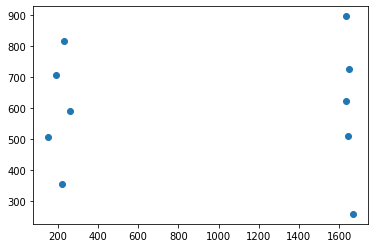

In [ ]:
# On définit la transformation homographe qui va "projeter" les joueurs sur notre dessin de court
def homographyTransform(src_pts, dst_pts):
  
  h, status = cv2.findHomography(src_pts, dst_pts)
  
  return h

# On calcule la matrice de transformation pour le terrain indoor
h = homographyTransform(src_pts, indoor_dst_pts)

# On applique cette transformation aux coordonnées des positions des joueurs
realPlayerPositions = playerPositionsInsideCourt[['Frame', 'ID', 'isInsideCourt']].copy()
realPlayerPositions[['X', 'Y']] = cv2.perspectiveTransform(np.array([playerPositionsInsideCourt[["XC", "Y2"]].to_numpy()], np.float32), h).reshape(-1, cv2.perspectiveTransform(np.array([playerPositionsInsideCourt[["XC", "Y2"]].to_numpy()], np.float32), h).shape[2])

# On ne garde que les joueurs à l'intérieur du court
realPlayerPositionsInsideCourt = realPlayerPositions[realPlayerPositions['isInsideCourt']]

# Test
test2 = realPlayerPositionsInsideCourt[(realPlayerPositionsInsideCourt['isInsideCourt']) & (realPlayerPositionsInsideCourt['Frame']  == 3)]
plt.scatter(test2["X"], test2["Y"])

## Normalisation des coordonnées et changement d'origine

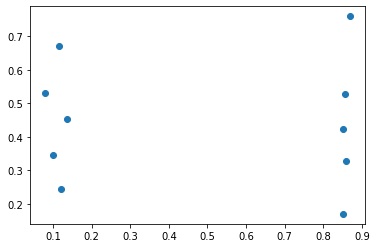

In [ ]:
#
# (0,1) ------ (1,1)
#   |            |
#   |   Terrain  |
#   |            |
# (0,0) ------ (1,0)
#

normalizedPlayerPositions = realPlayerPositionsInsideCourt.copy()

# On définit la taille de l'image
image_length = 1920
image_width = 1080

# On normalise les positions
normalizedPlayerPositions['X'] /= image_length

# On applique la transformation f: y -> (1 - y) pour avoir des coordonnées entre 0 et 1 avec l'origine en bas à gauche
normalizedPlayerPositions['Y'] = 1 - normalizedPlayerPositions['Y'] / image_width

# On définit le nombre de frames
nb_frames = 877

# Ainsi que le nombre d'images par seconde
fps = 24

# On convertit les Frames en temps de jeu
normalizedPlayerPositions["Time"] = normalizedPlayerPositions["Frame"] / fps

# Test
test3 = normalizedPlayerPositions[(normalizedPlayerPositions['isInsideCourt']) & (normalizedPlayerPositions['Frame']  == 3)]
plt.scatter(test3["X"], test3["Y"])

## Identification des joueurs et création des dictionnaires de positions

In [ ]:
# On identifie sur la vidéo les ID de détections correspondant à chaque joueur (manuellement, relou...)
cheikh = [4, 46, 83, 98, 124, 130, 115, 195, 225, 235]
tomasz = [10, 161, 202, 190]
alfred = [5, 61, 81, 96, 183, 155]
mehdi = [14, 80, 141, 146, 170]
nico = [17, 112, 35, 155, 158, 190, 203]

# On définit la liste des ID révos #backinthegame
revos_id = [cheikh, tomasz, alfred, mehdi, nico]

# On définit les noms associés
revos_names = ['cheikh', 'tomasz', 'alfred', 'mehdi', 'nico']

# On fait de même pour l'adversaire (en partant du fond)
opponent1 = [3, 99, 150, 81, 175, 217]
opponent2 = [12]
opponent3 = [6, 38, 53, 58, 86, 111, 117, 124, 201, 219]
opponent4 = [7, 34, 75, 81, 191, 200, 195]
opponent5 = [8, 41, 70, 53, 82, 97]

# On définit la liste des ID adverses
opponents_id = [opponent1, opponent2, opponent3, opponent4, opponent5]

# On définit les noms associés
opponents_names = ['opponent1', 'opponent2', 'opponent3', 'opponent4', 'opponent5']

In [ ]:
# On initialise le dictionnaire des Révos et la boucle
revos = {}
id_list = 0

# On itère sur les noms des Revos sur le terrain
for revos_name in revos_names:
  
  # On nomme le DataFrame
  df_name = revos_name + '_positions'
  
  # On garde uniquement les ID dans la liste correspondant au nom de ce DataFrame
  revos[df_name] = normalizedPlayerPositions.copy() 
  revos[df_name] = revos[df_name][revos[df_name].ID.isin(revos_id[id_list])]

  #revos[df_name] = revos[df_name].drop(revos[df_name][(abs(revos[df_name].X - revos[df_name].X.mean()) > revos[df_name].X.std()) | (abs(revos[df_name].Y - revos[df_name].Y.mean()) > revos[df_name].Y.std())].index)
  
  # On nomme les joueurs dans les tracking data
  revos[df_name]["Name"] = revos_name
  
  # On passe au nom suivant
  id_list += 1

# On identifie aussi les joueurs adverses
opponents = {}
id_list = 0

for opponents_name in opponents_names:
  df_name = opponents_name + '_positions'
  opponents[df_name] = normalizedPlayerPositions.copy()
  opponents[df_name] = opponents[df_name][opponents[df_name].ID.isin(opponents_id[id_list])]
  #opponents[df_name] = opponents[df_name].drop(opponents[df_name][(abs(opponents[df_name].X - opponents[df_name].X.mean()) > opponents[df_name].X.std()) | (abs(opponents[df_name].Y - opponents[df_name].Y.mean()) > opponents[df_name].Y.std())].index)
  opponents[df_name]["Name"] = opponents_name
  id_list += 1

# Test
revos["cheikh_positions"][revos["cheikh_positions"]["Frame"] == 3]

Frame  ID isInsideCourt         X         Y   Time    Name
3      3   4          True  0.868444  0.760019  0.125  cheikh

In [ ]:
# On concatène les DataFrame des deictionnaires pour avoir un seul DataFrame avec les positions de tous les Revos
revosFinalPositions = pd.concat([revos[revos_name + '_positions'] for revos_name in revos_names])

# On fait de même avec les adversaires
opponentFinalPositions = pd.concat([opponents[opponents_name + '_positions'] for opponents_name in opponents_names])

# Test
revosFinalPositions[revosFinalPositions["Frame"] == 3]

Frame  ID isInsideCourt         X         Y   Time    Name
3       3   4          True  0.868444  0.760019  0.125  cheikh
9       3  10          True  0.857360  0.527953  0.125  tomasz
4       3   5          True  0.850338  0.422392  0.125  alfred
13      3  14          True  0.859146  0.328450  0.125   mehdi
15      3  17          True  0.850246  0.170450  0.125    nico

In [ ]:
revosTrackingData = pd.pivot_table(revosFinalPositions, index = ["Frame", "Time"], columns = ["Name"], values = ["X","Y"])
opponentTrackingData = pd.pivot_table(opponentFinalPositions, index = ["Frame", "Time"], columns = ["Name"], values = ["X","Y"])

revosTrackingData.columns = ['_'.join(tup).rstrip('_') for tup in revosTrackingData.columns.values]
opponentTrackingData.columns = ['_'.join(tup).rstrip('_') for tup in opponentTrackingData.columns.values]

revosTrackingData = revosTrackingData.interpolate().reset_index()
opponentTrackingData = opponentTrackingData.interpolate().reset_index()

# Test
revosTrackingData

Frame       Time  X_alfred  ...   Y_mehdi    Y_nico  Y_tomasz
0        3   0.125000  0.850338  ...  0.328450  0.170450  0.527953
1        4   0.166667  0.850742  ...  0.328676  0.170330  0.528278
2        5   0.208333  0.851495  ...  0.327980  0.170545  0.528583
3        6   0.250000  0.851572  ...  0.332934  0.170957  0.529158
4        7   0.291667  0.851464  ...  0.335806  0.170467  0.529505
..     ...        ...       ...  ...       ...       ...       ...
870    873  36.375000  0.887983  ...  0.104565  0.651058  0.671433
871    874  36.416667  0.895906  ...  0.111208  0.657290  0.667820
872    875  36.458333  0.896870  ...  0.105025  0.644105  0.659406
873    876  36.500000  0.869672  ...  0.105893  0.581593  0.656820
874    877  36.541667  0.874996  ...  0.105749  0.593841  0.667601

[875 rows x 12 columns]

In [ ]:
# On définit la fonction pour passer des coordonnées normalisées aux coordonnées métriques

def to_metric_coordinates(data, field_dimen = (40., 20.)):
    '''
    Convert positions from normalized units to meters (with origin at centre of pitch)
    '''
    x_columns = [c for c in data.columns if c[0].lower()=='x']
    y_columns = [c for c in data.columns if c[0].lower()=='y']
    data[x_columns] = (data[x_columns] - 0.5) * field_dimen[0]
    data[y_columns] = (data[y_columns] - 0.5) * field_dimen[1]

    return data

# On applique la fonction à nos données
revosTrackingData = to_metric_coordinates(revosTrackingData)
opponentTrackingData = to_metric_coordinates(opponentTrackingData)

# Test
revosTrackingData

Frame       Time   X_alfred  ...   Y_mehdi    Y_nico  Y_tomasz
0        3   0.125000  14.013507  ... -3.431005 -6.590997  0.559060
1        4   0.166667  14.029696  ... -3.426478 -6.593410  0.565562
2        5   0.208333  14.059812  ... -3.440392 -6.589092  0.571663
3        6   0.250000  14.062871  ... -3.341312 -6.580864  0.583164
4        7   0.291667  14.058553  ... -3.283877 -6.590663  0.590098
..     ...        ...        ...  ...       ...       ...       ...
870    873  36.375000  15.519325  ... -7.908709  3.021157  3.428655
871    874  36.416667  15.836258  ... -7.775845  3.145799  3.356398
872    875  36.458333  15.874802  ... -7.899507  2.882104  3.188110
873    876  36.500000  14.786891  ... -7.882140  1.631852  3.136402
874    877  36.541667  14.999830  ... -7.885022  1.876812  3.352023

[875 rows x 12 columns]

# Définition des fonctions utiles

## Fonction pour calculer les vitesses des joueurs

In [ ]:
def calc_player_velocities(team, smoothing = True, filter_ = 'Savitzky-Golay', window = 7, polyorder = 1, maxspeed = 12):
    """ calc_player_velocities(tracking_data)
    
    Calculate player velocities in x & y direciton, and total player speed at each timestamp of the tracking data
    
    Parameters
    -----------
        team: the tracking DataFrame for home or away team
        smoothing: boolean variable that determines whether velocity measures are smoothed. Default is True.
        filter: type of filter to use when smoothing the velocities. Default is Savitzky-Golay, which fits a polynomial of order 'polyorder' to the data within each window
        window: smoothing window size in # of frames
        polyorder: order of the polynomial for the Savitzky-Golay filter. Default is 1 - a linear fit to the velcoity, so gradient is the acceleration
        maxspeed: the maximum speed that a player can realisitically achieve (in meters/second). Speed measures that exceed maxspeed are tagged as outliers and set to NaN. 
        
    Returrns
    -----------
       team : the tracking DataFrame with columns for speed in the x & y direction and total speed added

    """
    
    # Get the player ids
    player_ids = np.unique([c[2:] for c in team.columns if c[0] == 'X' or c[0] == 'Y'])

    # Calculate the timestep from one frame to the next.
    dt = team['Time'].diff()
    
    # estimate velocities for players in team
    for player in player_ids: # cycle through players individually

        # difference player positions in timestep dt to get unsmoothed estimate of velicity
        vx = team["X_" + player].diff() / dt
        vy = team["Y_" + player].diff() / dt

        if maxspeed > 0:
            # remove unsmoothed data points that exceed the maximum speed (these are most likely position errors)
            raw_speed = np.sqrt(vx**2 + vy**2)
            vx[raw_speed > maxspeed] = np.nan
            vy[raw_speed > maxspeed] = np.nan
            
        if smoothing:
            if filter_ == 'Savitzky-Golay':
                vx = signal.savgol_filter(vx, window_length = window, polyorder = polyorder)
                vy = signal.savgol_filter(vy, window_length = window, polyorder = polyorder)        
            elif filter_ == 'moving average':
                ma_window = np.ones(window) / window
                vx = np.convolve(vx, ma_window, mode='same') 
                vy = np.convolve(vy, ma_window, mode='same')
        
        # put player speed in x,y direction, and total speed back in the data frame
        team["Vx_" + player] = vx
        team["Vy_" + player] = vy
        team["Speed_" + player] = np.sqrt(vx**2 + vy**2)

    return team

## Fonctions de Visualisation

### Traçage de terrain

In [ ]:
# On définit la fonction pour tracer le terrain

def plot_pitch(field_dimen = (40.0, 20.0), field_color = 'green', linewidth = 2, markersize = 20):
    """ plot_pitch
    
    Plots an ultimate frisbee pitch. All distance units converted to meters.
    
    Parameters
    -----------
        field_dimen: (length, width) of field in meters. Default is (40, 20)
        field_color: color of field. options are {'green', 'white'}
        linewidth  : width of lines. default = 2
        markersize : size of markers (e.g. penalty spot, centre spot, posts). default = 20
        
    Returns
    -----------
       fig, ax : figure and aixs objects (so that other data can be plotted onto the pitch)

    """
    fig, ax = plt.subplots(figsize = (12, 8)) # create a figure 

    # decide what color we want the field to be. Default is green, but can also choose white
    if field_color == 'green':
        ax.set_facecolor('mediumseagreen')
        lc = 'whitesmoke' # line color
        pc = 'w' # 'spot' colors
    elif field_color == 'white':
        lc = 'k'
        pc = 'k'

    # ALL DIMENSIONS IN m
    border_dimen = (0, 0) # include a border arround of the field of width 0 m
    half_pitch_length = field_dimen[0] / 2. # length of half pitch
    half_pitch_width = field_dimen[1] / 2. # width of half pitch
    signs = [-1, 1]

    # plot half way line
    ax.plot([0, 0], [- half_pitch_width, half_pitch_width], lc, linewidth = linewidth)

    for s in signs: # plots each line seperately
        # plot pitch boundary
        ax.plot([-half_pitch_length, half_pitch_length], [s * half_pitch_width, s * half_pitch_width], lc, linewidth = linewidth)
        ax.plot([s * half_pitch_length, s * half_pitch_length], [-half_pitch_width, half_pitch_width], lc, linewidth = linewidth)

        # plot brick marks
        ax.scatter(s * (half_pitch_length - field_dimen[0] / 3.), 0.0, marker = 'o', facecolor = lc, linewidth = 0, s = markersize)

        # plot end zones lines
        ax.plot([s * (half_pitch_length - 6), s * (half_pitch_length - 6)], [- half_pitch_width, half_pitch_width], lc, linewidth = linewidth)
        
    # remove axis labels and ticks
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.set_xticks([])
    ax.set_yticks([])

    # set axis limits
    xmax = field_dimen[0] / 2. + border_dimen[0]
    ymax = field_dimen[1] / 2. + border_dimen[1]
    ax.set_xlim([-xmax, xmax])
    ax.set_ylim([-ymax, ymax])
    ax.set_axisbelow(True)

    return fig, ax

### Traçage de position des joueurs à un instant donné

In [ ]:
# On définit la fonction pour tracer la position des joueurs à un instant donné

def plot_frame(hometeam, awayteam, figax = None, frisbee_position = (0., 0.), team_colors = ('r', 'b'), field_dimen = (40.0, 20.0), 
               include_player_velocities = False, PlayerMarkerSize = 10, PlayerAlpha = 0.7, annotate = False):
    """ plot_frame( hometeam, awayteam )
    
    Plots a frame tracking data (player positions) on a frisbee pitch. All distances should be in meters.
    
    Parameters
    -----------
        hometeam: row (i.e. instant) of the home team tracking data frame
        awayteam: row of the away team tracking data frame
        fig, ax: Can be used to pass in the (fig, ax) objects of a previously generated pitch. Set to (fig, ax) to use an existing figure, or None (the default) to generate a new pitch plot
        team_colors: Tuple containing the team colors of the home & away team. Default is 'r' (red, home team) and 'b' (blue away team)
        field_dimen: tuple containing the length and width of the pitch in meters. Default is (40, 20)
        include_player_velocities: Boolean variable that determines whether player velocities are also plotted (as quivers). Default is False
        PlayerMarkerSize: size of the individual player marlers. Default is 10
        PlayerAlpha: alpha (transparency) of player markers. Defaault is 0.7
        annotate: Boolean variable that determines with player jersey numbers are added to the plot (default is False)
        
    Returns
    -----------
       fig, ax : figure and aixs objects (so that other data can be plotted onto the pitch)

    """
    if figax is None: # create new pitch 
        fig, ax = plot_pitch(field_dimen = field_dimen)
    else: # overlay on a previously generated pitch
        fig, ax = figax # unpack tuple

    # plot home & away teams in order
    for team, color in zip([hometeam, awayteam], team_colors):
      x_columns = [c for c in team.keys() if c[0].lower()=='x' and c!='ball_x'] # column header for player x positions
      y_columns = [c for c in team.keys() if c[0].lower()=='y' and c!='ball_y'] # column header for player y positions
      ax.plot( team[x_columns], team[y_columns], color+'o', MarkerSize=PlayerMarkerSize, alpha=PlayerAlpha ) # plot player positions
      if include_player_velocities:
        #vx_columns = ['{}_vx'.format(c[:-2]) for c in x_columns] # column header for player x positions
        #vy_columns = ['{}_vy'.format(c[:-2]) for c in y_columns] # column header for player y positions
        vx_columns = [c for c in team.keys() if c[:2].lower()=='vx'] # column header for player x positions
        vy_columns = [c for c in team.keys() if c[:2].lower()=='vy'] # column header for player y positions
        ax.quiver(team[x_columns], team[y_columns], team[vx_columns], team[vy_columns], color = color, scale_units = 'inches', scale = 10., width = 0.0015, headlength = 5, headwidth = 3, alpha = PlayerAlpha)
      if annotate:
        [ ax.text( team[x] + 0.5, team[y] + 0.5, x.split('_')[1], fontsize=10, color=color  ) for x,y in zip(x_columns,y_columns) if not ( np.isnan(team[x]) or np.isnan(team[y]) ) ] 

    # plot frisbee
    ax.plot(frisbee_position[0], frisbee_position[1], 'ko', MarkerSize = 6, alpha = 1.0, LineWidth = 0)
    
    return fig, ax

### Création d'un clip vidéo des positions des joueurs durant le point

In [ ]:
# On définit la fonction pour créer un clip animé du point

def save_match_clip(hometeam, awayteam, fpath, fname = 'clip_test', frisbee_position = (0., 0.), figax = None, frames_per_second = 24, team_colors = ('r', 'b'), 
                    field_dimen = (40.0, 20.0), include_player_velocities = False, PlayerMarkerSize = 10, PlayerAlpha = 0.7):
  
    """ save_match_clip( hometeam, awayteam, fpath )
    
    Generates a movie from tracking data, saving it in the 'fpath' directory with name 'fname'
    
    Parameters
    -----------
        hometeam: home team tracking data DataFrame. Movie will be created from all rows in the DataFrame
        awayteam: away team tracking data DataFrame. The indices *must* match those of the hometeam DataFrame
        fpath: directory to save the movie
        fname: movie filename. Default is 'clip_test.mp4'
        fig, ax: Can be used to pass in the (fig, ax) objects of a previously generated pitch. Set to (fig, ax) to use an existing figure, or None (the default) to generate a new pitch plot
        frames_per_second: frames per second to assume when generating the movie. Default is 24.
        team_colors: Tuple containing the team colors of the home & away team. Default is 'r' (red, home team) and 'b' (blue away team)
        field_dimen: tuple containing the length and width of the pitch in meters. Default is (40, 20)
        include_player_velocities: Boolean variable that determines whether player velocities are also plotted (as quivers). Default is False
        PlayerMarkerSize: size of the individual player marlers. Default is 10
        PlayerAlpha: alpha (transparency) of player markers. Defaault is 0.7
        
    Returrns
    -----------
       fig, ax : figure and aixs objects (so that other data can be plotted onto the pitch)

    """
    
    # check that indices match first
    assert np.all(hometeam.index == awayteam.index), "Home and away team Dataframe indices must be the same"
    
    # in which case use home team index
    index = hometeam.index
    
    # Set figure and movie settings
    FFMpegWriter = animation.writers['ffmpeg']
    metadata = dict(title = 'Tracking Data', artist = 'Matplotlib', comment = 'Tracking data clip')
    writer = FFMpegWriter(fps = frames_per_second, metadata = metadata)
    fname = fpath + '/' +  fname + '.mp4' # path and filename
    
    # create football pitch
    if figax is None:
        fig, ax = plot_pitch(field_dimen = field_dimen)
    else:
        fig, ax = figax
    fig.set_tight_layout(True)
    
    # Generate movie
    print("Generating movie...", end = '')
    with writer.saving(fig, fname, 100):
        for i in index:
            figobjs = [] # this is used to collect up all the axis objects so that they can be deleted after each iteration
            for team, color in zip( [hometeam.loc[i], awayteam.loc[i]], team_colors):
              x_columns = [c for c in team.keys() if c[0].lower()=='x' and c!='ball_x'] # column header for player x positions
              y_columns = [c for c in team.keys() if c[0].lower()=='y' and c!='ball_y'] # column header for player y positions
              objs, = ax.plot( team[x_columns], team[y_columns], color+'o', MarkerSize=PlayerMarkerSize, alpha=PlayerAlpha ) # plot player positions
              figobjs.append(objs)
              if include_player_velocities:
                #vx_columns = ['{}_vx'.format(c[:-2]) for c in x_columns] # column header for player x positions
                #vy_columns = ['{}_vy'.format(c[:-2]) for c in y_columns] # column header for player y positions
                vx_columns = [c for c in team.keys() if c[:2].lower()=='vx'] # column header for player x positions
                vy_columns = [c for c in team.keys() if c[:2].lower()=='vy'] # column header for player y positions
                objs = ax.quiver( team[x_columns], team[y_columns], team[vx_columns], team[vy_columns], color=color, scale_units='inches', scale=10.,width=0.0015,headlength=5,headwidth=3,alpha=PlayerAlpha)
                figobjs.append(objs)

            # plot frisbee
            objs, = ax.plot(frisbee_position[0], frisbee_position[1], 'ko', MarkerSize = 6, alpha = 1.0, LineWidth = 0)
            figobjs.append(objs)

            # include match time at the top
            frame_minute = int(team["Time"] / 60.)
            frame_second = (team["Time"] / 60. - frame_minute ) * 60.
            timestring = "%d:%1.2f" % (frame_minute, frame_second)
            objs = ax.text(-2.5, field_dimen[1] / 2. + 1., timestring, fontsize = 14)
            figobjs.append(objs)
            writer.grab_frame()

            # Delete all axis objects (other than pitch lines) in preperation for next frame
            for figobj in figobjs:
                figobj.remove()

    print("done")
    plt.clf()
    plt.close(fig)    

### Traçage du contrôle de terrain à un instant donné

In [ ]:
def plot_pitchcontrol_for_event(frame, tracking_home, tracking_away, PPCF, frisbee_position = (0., 0.), pass_team = 'Home', alpha = 0.7, include_player_velocities = True, annotate = False, field_dimen = (40., 20.)):
    """ plot_pitchcontrol_for_event( event_id, events,  tracking_home, tracking_away, PPCF )
    
    Plots the pitch control surface at the instant of the event given by the event_id. Player and ball positions are overlaid.
    
    Parameters
    -----------
        frame
        tracking_home: (entire) tracking DataFrame for the Home team
        tracking_away: (entire) tracking DataFrame for the Away team
        PPCF: Pitch control surface (dimen (n_grid_cells_x,n_grid_cells_y) ) containing pitch control probability for the attcking team (as returned by the generate_pitch_control_for_event in Metrica_PitchControl)
        frisbee_position
        pass_team
        alpha: alpha (transparency) of player markers. Default is 0.7
        include_player_velocities: Boolean variable that determines whether player velocities are also plotted (as quivers). Default is False
        annotate: Boolean variable that determines with player jersey numbers are added to the plot (default is False)
        field_dimen: tuple containing the length and width of the pitch in meters. Default is (106,68)
        
    NB: this function no longer requires xgrid and ygrid as an input
        
    Returrns
    -----------
       fig,ax : figure and aixs objects (so that other data can be plotted onto the pitch)

    """    

    # pick a pass at which to generate the pitch control surface
    pass_frame = frame
    pass_team = pass_team
    
    # plot frame and event
    fig, ax = plot_pitch(field_color = 'white', field_dimen = field_dimen)
    plot_frame(tracking_home.loc[pass_frame], tracking_away.loc[pass_frame], figax = (fig, ax), frisbee_position = frisbee_position, PlayerAlpha = alpha, include_player_velocities = include_player_velocities, annotate = annotate)
    #plot_events(events.loc[event_id:event_id], figax = (fig,ax), indicators = ['Marker','Arrow'], annotate=False, color= 'k', alpha=1 )
    
    # plot pitch control surface
    if pass_team=='Home':
        cmap = 'bwr'
    else:
        cmap = 'bwr_r'
    ax.imshow(np.flipud(PPCF), extent = (- field_dimen[0] / 2., field_dimen[0] / 2., - field_dimen[1] / 2., field_dimen[1] / 2.), interpolation = 'spline36', vmin = 0.0, vmax = 1.0, cmap = cmap, alpha = 0.5)

    return fig,ax

### Traçage de l'EPV à un instant donné

In [ ]:
def plot_EPV_for_event(frame, tracking_home, tracking_away, PPCF, EPV, pass_team = 'Home', alpha = 0.7, 
                       include_player_velocities = True, annotate = False, autoscale = 0.1, contours = False, field_dimen = (40., 20.)):
    """ plot_EPV_for_event( event_id, events,  tracking_home, tracking_away, PPCF, EPV, alpha, include_player_velocities, annotate, autoscale, contours, field_dimen)
    
    Plots the EPVxPitchControl surface at the instant of the event given by the event_id. Player and ball positions are overlaid.
    
    Parameters
    -----------
        event_id: Index (not row) of the event that describes the instant at which the pitch control surface should be calculated
        events: Dataframe containing the event data
        tracking_home: (entire) tracking DataFrame for the Home team
        tracking_away: (entire) tracking DataFrame for the Away team
        PPCF: Pitch control surface (dimen (n_grid_cells_x,n_grid_cells_y) ) containing pitch control probability for the attcking team (as returned by the generate_pitch_control_for_event in Metrica_PitchControl)
        EPV: Expected Possession Value surface. EPV is the probability that a possession will end with a goal given the current location of the ball. 
             The EPV surface is saved in the FoT github repo and can be loaded using Metrica_EPV.load_EPV_grid()
        alpha: alpha (transparency) of player markers. Default is 0.7
        include_player_velocities: Boolean variable that determines whether player velocities are also plotted (as quivers). Default is False
        annotate: Boolean variable that determines with player jersey numbers are added to the plot (default is False)
        autoscale: If True, use the max of surface to define the colorscale of the image. If set to a value [0-1], uses this as the maximum of the color scale.
        field_dimen: tuple containing the length and width of the pitch in meters. Default is (106,68)
        
    Returrns
    -----------
       fig,ax : figure and aixs objects (so that other data can be plotted onto the pitch)

    """    

    # pick a pass at which to generate the pitch control surface
    pass_frame = frame
    pass_team = pass_team
    
    # plot frame and event
    fig, ax = plot_pitch(field_color = 'white', field_dimen = field_dimen)
    plot_frame(tracking_home.loc[pass_frame], tracking_away.loc[pass_frame], figax = (fig, ax), PlayerAlpha = alpha, include_player_velocities = include_player_velocities, annotate = annotate)
    #plot_events(events.loc[event_id:event_id], figax = (fig,ax), indicators = ['Marker','Arrow'], annotate=False, color= 'k', alpha=1 )
       
    # plot pitch control surface
    if pass_team=='Home':
        cmap = 'Reds'
        lcolor = 'r'
        EPV = np.fliplr(EPV) #if find_playing_direction(tracking_home,'Home') == -1 else EPV
    else:
        cmap = 'Blues'
        lcolor = 'b'
        EPV = np.fliplr(EPV) #if find_playing_direction(tracking_away,'Away') == -1 else EPV
    
    EPVxPPCF = PPCF * EPV
    
    if autoscale is True:
        vmax = np.max(EPVxPPCF) * 2.
    elif autoscale >= 0 and autoscale <= 1:
        vmax = autoscale
    else:
        assert False, "'autoscale' must be either {True or between 0 and 1}"
        
    ax.imshow(np.flipud(EPVxPPCF), extent = (- field_dimen[0] / 2., field_dimen[0] / 2., - field_dimen[1] / 2., field_dimen[1] / 2.), interpolation = 'spline36', vmin = 0.0, vmax = vmax, cmap = cmap, alpha = 0.7)
    
    if contours:
        ax.contour(EPVxPPCF, extent = (- field_dimen[0] / 2., field_dimen[0] / 2., - field_dimen[1] / 2., field_dimen[1] / 2.), levels = np.array([0.75]) * np.max(EPVxPPCF), colors = lcolor, alpha = 1.0)
    
    return fig,ax


### Traçage de l'EPV

In [ ]:
# plot the EPV surface

def plot_EPV(EPV,field_dimen=(40., 20.), attack_direction = 1):
    """ plot_EPV( EPV,  field_dimen, attack_direction)
    
    Plots the pre-generated Expected Possession Value surface 
    
    Parameters
    -----------
        EPV: The 32x50 grid containing the EPV surface. EPV is the probability that a possession will end with a goal given the current location of the ball. 
             The EPV surface is saved in the FoT github repo and can be loaded using Metrica_EPV.load_EPV_grid()
        field_dimen: tuple containing the length and width of the pitch in meters. Default is (106,68)
        attack_direction: Sets the attack direction (1: left->right, -1: right->left)
            
    Returrns
    -----------
       fig,ax : figure and aixs objects (so that other data can be plotted onto the pitch)

    """    
    if attack_direction == -1:
        # flip direction of grid if team is attacking right->left
        EPV = np.fliplr(EPV)
    
    ny, nx = EPV.shape
    
    # plot a pitch
    fig, ax = plot_pitch(field_color = 'white', field_dimen = field_dimen)
    
    # overlap the EPV surface
    ax.imshow(EPV, extent=(- field_dimen[0] / 2., field_dimen[0] / 2., - field_dimen[1] / 2., field_dimen[1] / 2.), vmin = 0.0, vmax = 1.0, cmap = 'viridis', alpha = 0.6)

## Fonctions pour le Contrôle du Terrain (Pitch Control)

Module for calculating a Pitch Control surface using tracking & event data.

Pitch control (at a given location on the field) is the probability that a team will gain  possession if the disc is moved to that location on the field. 

**Functions**

calculate_pitch_control_at_target(): calculate the pitch control probability for the attacking and defending teams at a specified target position on the disc.

generate_pitch_control_for_event(): this function evaluates pitch control surface over the entire field at the moment of the given event (determined by the index of the event passed as an input)

**Classes**

The 'player' class collects and stores trajectory information for each player required by the pitch control calculations.

### Initialisation des joueurs

In [ ]:
def initialise_players(team, teamname, params):
    """
    initialise_players(team, teamname, params)
    
    create a list of player objects that holds their positions and velocities from the tracking data dataframe 
    
    Parameters
    -----------
    
    team: row (i.e. instant) of either the home or away team tracking Dataframe
    teamname: team name "Home" or "Away"
    params: Dictionary of model parameters (default model parameters can be generated using default_model_params() )
        
    Returns
    -----------
    
    team_players: list of player objects for the team at at given instant
    
    """    
    # get player  ids
    
    player_ids = np.unique([c[2:] for c in team.keys() if c[0] == 'X' or c[0] == 'Y'])

    # create list

    team_players = []

    for p in player_ids:

        # create a player object for player_id 'p'
        team_player = player(p, team, teamname, params)

        if team_player.inframe:
            team_players.append(team_player)

    return team_players

### Classe "Joueur"

In [ ]:
class player(object):
    """
    player() class
    
    Class defining a player object that stores position, velocity, time-to-intercept and pitch control contributions for a player
    
    __init__ Parameters
    -----------
    pid: id (jersey number) of player
    team: row of tracking data for team
    teamname: team name "Home" or "Away"
    params: Dictionary of model parameters (default model parameters can be generated using default_model_params() )

    methods include:
    -----------
    simple_time_to_intercept(r_final): time take for player to get to target position (r_final) given current position
    probability_intercept_ball(T): probability player will have controlled ball at time T given their expected time_to_intercept
    
    """
    # player object holds position, velocity, time-to-intercept and pitch control contributions for each player
    def __init__(self, pid, team, teamname, params):
        self.id = pid
        self.teamname = teamname
        self.playername = "%s" %pid
        self.vmax = params['max_player_speed'] # player max speed in m/s. Could be individualised
        self.reaction_time = params['reaction_time'] # player reaction time in 's'. Could be individualised
        self.tti_sigma = params['tti_sigma'] # standard deviation of sigmoid function (see Eq 4 in Spearman, 2018)
        self.lambda_att = params['lambda_att'] # standard deviation of sigmoid function (see Eq 4 in Spearman, 2018)
        self.lambda_def = params['lambda_def'] # factor of 3 ensures that anything near the GK is likely to be claimed by the GK
        self.get_position(team)
        self.get_velocity(team)
        self.PPCF = 0. # initialise this for later
        
    def get_position(self, team):
        self.position = np.array( [ team['X_' + self.playername], team['Y_' + self.playername] ] )
        self.inframe = not np.any( np.isnan(self.position) )
        
    def get_velocity(self,team):
        self.velocity = np.array( [ team['Vx_' + self.playername], team['Vy_' + self.playername] ] )
        if np.any( np.isnan(self.velocity) ):
            self.velocity = np.array([0.,0.])
    
    def simple_time_to_intercept(self, r_final):
        self.PPCF = 0. # initialise this for later
        # Time to intercept assumes that the player continues moving at current velocity for 'reaction_time' seconds
        # and then runs at full speed to the target position.
        r_reaction = self.position + self.velocity*self.reaction_time
        self.time_to_intercept = self.reaction_time + np.linalg.norm(r_final-r_reaction)/self.vmax
        return self.time_to_intercept

    def probability_intercept_frisbee(self,T):
        # probability of a player arriving at target location at time 'T' given their expected time_to_intercept (time of arrival), as described in Spearman 2018
        f = 1/(1. + np.exp( -np.pi/np.sqrt(3.0)/self.tti_sigma * (T-self.time_to_intercept) ) )
        return f

### Paramètres du modèle

In [ ]:
def default_model_params(time_to_control_veto = 3):
    """
    default_model_params()
    
    Returns the default parameters that define and evaluate the model.
    
    Parameters
    -----------
    time_to_control_veto: If the probability that another team or player can get to the frisbee and control it is less than 10^-time_to_control_veto, ignore that player.
    
    Returns
    -----------
    
    params: dictionary of parameters required to determine and calculate the model
    
    """
    # key parameters for the model
    params = {}
    # model parameters
    params['max_player_accel'] = 7. # maximum player acceleration m/s/s, not used in this implementation
    params['max_player_speed'] = 5. # maximum player speed m/s
    params['reaction_time'] = 0.7 # seconds, time taken for player to react and change trajectory. Roughly determined as vmax/amax
    params['tti_sigma'] = 0.45 # Standard deviation of sigmoid function in Spearman 2018 ('s') that determines uncertainty in player arrival time
    params['kappa_def'] =  1. # kappa parameter in Spearman 2018 (=1.72 in the paper) that gives the advantage defending players to control ball, I have set to 1 so that home & away players have same ball control probability
    params['lambda_att'] = 4.3 # ball control parameter for attacking team
    params['lambda_def'] = 4.3 * params['kappa_def'] # ball control parameter for defending team
    params['average_frisbee_speed'] = 15. # average frisbee travel speed in m/s
    # numerical parameters for model evaluation
    params['int_dt'] = 0.04 # integration timestep (dt)
    params['max_int_time'] = 10 # upper limit on integral time
    params['model_converge_tol'] = 0.01 # assume convergence when PPCF>0.99 at a given location.
    # The following are 'short-cut' parameters. We do not need to calculated PPCF explicitly when a player has a sufficient head start. 
    # A sufficient head start is when the a player arrives at the target location at least 'time_to_control' seconds before the next player
    params['time_to_control_att'] = time_to_control_veto*np.log(10) * (np.sqrt(3)*params['tti_sigma']/np.pi + 1/params['lambda_att'])
    params['time_to_control_def'] = time_to_control_veto*np.log(10) * (np.sqrt(3)*params['tti_sigma']/np.pi + 1/params['lambda_def'])
    return params

### Génération du contrôle de terrain à un instant donné

In [ ]:
def generate_pitch_control_for_event(frame, tracking_home, tracking_away, params, frisbee_position = (0., 0.), pass_team = 'Home', field_dimen = (40., 20.), n_grid_cells_x = 50):
    """ generate_pitch_control_for_event
    
    Evaluates pitch control surface over the entire field at the moment of the given frame

    Parameters
    -----------
        frame: frame number for which we want to evaluate pitch control
        tracking_home: tracking DataFrame for the Home team
        tracking_away: tracking DataFrame for the Away team
        params: Dictionary of model parameters (default model parameters can be generated using default_model_params() )
        frisbee_position: coordinates of frisbee position at that frame
        pass_team: team in possession of the frisbee at the given frame (can be 'Home' or 'Away'). Default is 'Home'
        field_dimen: tuple containing the length and width of the pitch in meters. Default is (40, 20)
        n_grid_cells_x: Number of pixels in the grid (in the x-direction) that covers the surface. Default is 50.
                        n_grid_cells_y will be calculated based on n_grid_cells_x and the field dimensions
        
    Returns
    -----------
        PPCFa: Pitch control surface (dimen (n_grid_cells_x,n_grid_cells_y) ) containing pitch control probability for the attcking team.
               Surface for the defending team is just 1-PPCFa.
        xgrid: Positions of the pixels in the x-direction (field length)
        ygrid: Positions of the pixels in the y-direction (field width)

    """
    # get the details of the event (frame, team in possession, ball_start_position)
    pass_frame = frame
    pass_team = pass_team
    frisbee_start_pos = np.array([frisbee_position[0], frisbee_position[1]])

    # break the pitch down into a grid
    n_grid_cells_y = int(n_grid_cells_x * field_dimen[1] / field_dimen[0])
    dx = field_dimen[0] / n_grid_cells_x
    dy = field_dimen[1] / n_grid_cells_y
    xgrid = np.arange(n_grid_cells_x) * dx - field_dimen[0] / 2. + dx / 2.
    ygrid = np.arange(n_grid_cells_y) * dy - field_dimen[1] / 2. + dy / 2.

    # initialise pitch control grids for attacking and defending teams 
    PPCFa = np.zeros(shape = (len(ygrid), len(xgrid)))
    PPCFd = np.zeros(shape = (len(ygrid), len(xgrid)))

    # initialise player positions and velocities for pitch control calc (so that we're not repeating this at each grid cell position)
    if pass_team=='Home':
        attacking_players = initialise_players(tracking_home.loc[pass_frame], 'Home', params)
        defending_players = initialise_players(tracking_away.loc[pass_frame], 'Away', params)
    elif pass_team=='Away':
        defending_players = initialise_players(tracking_home.loc[pass_frame], 'Home', params)
        attacking_players = initialise_players(tracking_away.loc[pass_frame], 'Away', params)
    else:
        assert False, "Team in possession must be either home or away"
        
    # calculate pitch pitch control model at each location on the pitch
    for i in range(len(ygrid)):
        for j in range(len(xgrid)):
            target_position = np.array([xgrid[j], ygrid[i]])
            PPCFa[i,j],PPCFd[i,j] = calculate_pitch_control_at_target(target_position, attacking_players, defending_players, frisbee_start_pos, params)

    # check probabilitiy sums within convergence
    checksum = np.sum(PPCFa + PPCFd) / float(n_grid_cells_y * n_grid_cells_x ) 
    assert 1 - checksum < params['model_converge_tol'], "Checksum failed: %1.3f" % (1-checksum)
    return PPCFa, xgrid, ygrid

### Calcul du contrôle de terrain pour une position donnée du disque

In [ ]:
def calculate_pitch_control_at_target(target_position, attacking_players, defending_players, frisbee_start_pos, params):
    """ calculate_pitch_control_at_target
    
    Calculates the pitch control probability for the attacking and defending teams at a specified target position on the frisbee.
    
    Parameters
    -----------
        target_position: size 2 numpy array containing the (x, y) position of the position on the field to evaluate pitch control
        attacking_players: list of 'player' objects (see player class above) for the players on the attacking team (team in possession)
        defending_players: list of 'player' objects (see player class above) for the players on the defending team
        frisbee_start_pos: Current position of the frisbee (start position for a pass). If set to NaN, function will assume that the frisbee is already at the target position.
        params: Dictionary of model parameters (default model parameters can be generated using default_model_params() )
        
    Returrns
    -----------
        PPCFatt: Pitch control probability for the attacking team
        PPCFdef: Pitch control probability for the defending team ( 1 - PPCFatt - PPCFdef <  params['model_converge_tol'] )

    """
    # calculate ball travel time from start position to end position.
    if frisbee_start_pos is None or any(np.isnan(frisbee_start_pos)): # assume that ball is already at location
        frisbee_travel_time = 0.0 
    else:
        # ball travel time is distance to target position from current ball position divided assumed average ball speed
        frisbee_travel_time = np.linalg.norm(target_position - frisbee_start_pos ) / params['average_frisbee_speed']
    
    # first get arrival time of 'nearest' attacking player (nearest also dependent on current velocity)
    tau_min_att = np.nanmin( [p.simple_time_to_intercept(target_position) for p in attacking_players] )
    tau_min_def = np.nanmin( [p.simple_time_to_intercept(target_position) for p in defending_players] )
    
    # check whether we actually need to solve equation 3

    if tau_min_att - max(frisbee_travel_time, tau_min_def) >= params['time_to_control_def']:
        # if defending team can arrive significantly before attacking team, no need to solve pitch control model
        return 0., 1.

    elif tau_min_def - max(frisbee_travel_time, tau_min_att) >= params['time_to_control_att']:
        # if attacking team can arrive significantly before defending team, no need to solve pitch control model
        return 1., 0.

    else: 
        # solve pitch control model by integrating equation 3 in Spearman et al.
        # first remove any player that is far (in time) from the target location
        attacking_players = [p for p in attacking_players if p.time_to_intercept-tau_min_att < params['time_to_control_att'] ]
        defending_players = [p for p in defending_players if p.time_to_intercept-tau_min_def < params['time_to_control_def'] ]
        
        # set up integration arrays
        dT_array = np.arange(frisbee_travel_time - params['int_dt'], frisbee_travel_time + params['max_int_time'], params['int_dt']) 
        PPCFatt = np.zeros_like(dT_array)
        PPCFdef = np.zeros_like(dT_array)

        # integration equation 3 of Spearman 2018 until convergence or tolerance limit hit (see 'params')
        
        ptot = 0.0
        i = 1
        
        while 1 - ptot > params['model_converge_tol'] and i < dT_array.size: 
            
            T = dT_array[i]

            for player in attacking_players:

                # calculate ball control probablity for 'player' in time interval T+dt
                dPPCFdT = (1 - PPCFatt[i-1] - PPCFdef[i-1]) * player.probability_intercept_frisbee(T) * player.lambda_att

                # make sure it's greater than zero
                assert dPPCFdT >= 0, 'Invalid attacking player probability (calculate_pitch_control_at_target)'
                player.PPCF += dPPCFdT * params['int_dt'] # total contribution from individual player
                PPCFatt[i] += player.PPCF # add to sum over players in the attacking team (remembering array element is zero at the start of each integration iteration)
            
            for player in defending_players:

                # calculate ball control probablity for 'player' in time interval T+dt
                dPPCFdT = (1 - PPCFatt[i-1] - PPCFdef[i-1]) * player.probability_intercept_frisbee(T) * player.lambda_def

                # make sure it's greater than zero
                assert dPPCFdT >= 0, 'Invalid defending player probability (calculate_pitch_control_at_target)'
                player.PPCF += dPPCFdT*params['int_dt'] # total contribution from individual player
                PPCFdef[i] += player.PPCF # add to sum over players in the defending team

            ptot = PPCFdef[i] + PPCFatt[i] # total pitch control probability 
            i += 1
        
        if i >= dT_array.size:
            print("Integration failed to converge: %1.3f" % (ptot) )
        
        return PPCFatt[i-1], PPCFdef[i-1]

## Fonctions pour l'Expected Possession Value

Module for exploring expected possession value (EPV) surfaces using tracking & event data.

EPV is the probability that a possession will end with a score given the current location of the disc. Multiplying by a pitch control surface gives the expected value of moving the disc to any location, accounting for the probability that the pass is successful.

**Main Functions**

load_EPV_grid(): load pregenerated EPV surface from file.

get_EPV_at_location():

calculate_epv_added(): Calculates the expected possession value added by a pass

find_max_value_added_target(): Finds the *maximum* expected possession value that could have been achieved for a pass (defined by the event_id) by searching the entire field for the best target.
    

### EPV Surface grid

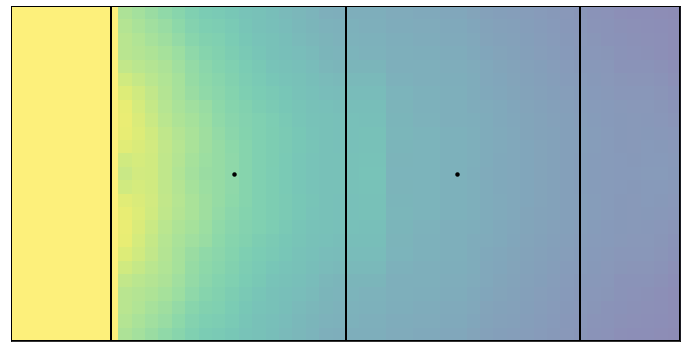

In [ ]:
""" *** GET EPV SURFACE **** """

def load_EPV_grid(fname = 'EPV_grid.csv'):
    """ load_EPV_grid(fname='EPV_grid.csv')
    
    # load pregenerated EPV surface from file. 
    
    Parameters
    -----------
        fname: filename & path of EPV grid (default is 'EPV_grid.csv' in the curernt directory)
        
    Returns
    -----------
        EPV: The EPV surface (default is a (32,50) grid)
    
    """
    epv = np.loadtxt(fname, delimiter = ';', encoding="utf_8_sig")
    return epv

EPV = load_EPV_grid('EPV_grid.csv')

### EPV at location

In [ ]:
def get_EPV_at_location(position, EPV, attack_direction, field_dimen = (40., 20.)):
    """ get_EPV_at_location
    
    Returns the EPV value at a given (x, y) location
    
    Parameters
    -----------
        position: Tuple containing the (x,y) pitch position
        EPV: tuple Expected Possession value grid (loaded using load_EPV_grid() )
        attack_direction: Sets the attack direction (1: left->right, -1: right->left)
        field_dimen: tuple containing the length and width of the pitch in meters. Default is (40, 20)
            
    Returrns
    -----------
        EPV value at input position
        
    """
    
    x, y = position
    if abs(x) > field_dimen[0] / 2. or abs(y) > field_dimen[1] / 2.:
        return 0.0 # Position is off the field, EPV is zero
    else:
        if attack_direction == -1:
            EPV = np.fliplr(EPV)
        ny, nx = EPV.shape
        dx = field_dimen[0] / float(nx)
        dy = field_dimen[1] / float(ny)
        ix = (x + field_dimen[0] / 2. - 0.0001) / dx
        iy = (y + field_dimen[1] / 2. - 0.0001) / dy
        return EPV[int(iy), int(ix)]

### EPV Added

In [ ]:
def calculate_epv_added(frame, tracking_home, tracking_away, EPV, params, frisbee_start_pos, frisbee_target_pos, pass_team = 'Home'):
    """ calculate_epv_added
    
    Calculates the expected possession value added by a pass
    
    Parameters
    -----------
        frame
        tracking_home: tracking DataFrame for the Home team
        tracking_away: tracking DataFrame for the Away team
        EPV: tuple Expected Possession value grid (loaded using load_EPV_grid() )
        params: Dictionary of pitch control model parameters (default model parameters can be generated using default_model_params() )
        
    Returrns
    -----------
        EEPV_added: Expected EPV value-added of pass defined by event_id
        EPV_difference: The raw change in EPV (ignoring pitch control) between end and start points of pass

    """
    # pull out pass details from the event data
    pass_start_pos = np.array([frisbee_start_pos[0], frisbee_start_pos[1]])
    pass_target_pos = np.array([frisbee_target_pos[0], frisbee_target_pos[1]])
    pass_frame = frame
    pass_team = pass_team
    
    # direction of play for atacking team (so we know whether to flip the EPV grid)
    
    #home_attack_direction = mio.find_playing_direction(tracking_home,'Home')
    
    if pass_team=='Home':

        #attack_direction = home_attack_direction
        attack_direction = 1
        attacking_players = initialise_players(tracking_home.loc[pass_frame], 'Home', params)
        defending_players = initialise_players(tracking_away.loc[pass_frame], 'Away', params)

    elif pass_team=='Away':

        #attack_direction = home_attack_direction * -1
        attack_direction = -1
        defending_players = initialise_players(tracking_home.loc[pass_frame], 'Home', params)
        attacking_players = initialise_players(tracking_away.loc[pass_frame], 'Away', params)

    # pitch control grid at pass start location
    Patt_start,_ = calculate_pitch_control_at_target(pass_start_pos, attacking_players, defending_players, pass_start_pos, params)
    # pitch control grid at pass end location
    Patt_target,_ = calculate_pitch_control_at_target(pass_target_pos, attacking_players, defending_players, pass_start_pos, params)
    
    # EPV at start location
    EPV_start = get_EPV_at_location(pass_start_pos, EPV, attack_direction=attack_direction)
    # EPV at end location
    EPV_target = get_EPV_at_location(pass_target_pos,EPV,attack_direction=attack_direction)
    
    # 'Expected' EPV at target and start location
    EEPV_target = Patt_target * EPV_target
    EEPV_start = Patt_start * EPV_start
    
    # difference is the (expected) EPV added
    EEPV_added = EEPV_target - EEPV_start
    
    # Also calculate the straight up change in EPV
    EPV_difference = EPV_target - EPV_start

    return EEPV_added, EPV_difference

# Rapport Physique

## Distance Parcourue

Text(0, 0.5, 'Distance covered [km]')

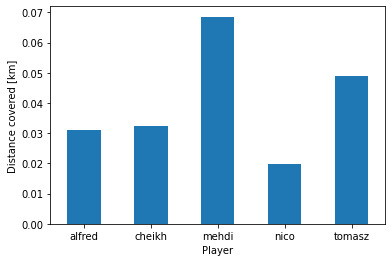

In [ ]:
# Create a Physical summary dataframe for home players
home_players = np.unique( [ c.split('_')[1] for c in revosTrackingData.columns if c[0] == 'X' ] )
home_summary = pd.DataFrame(index = home_players)

# Calculate minutes played for each player
minutes = []
for player in home_players:
    # search for first and last frames that we have a position observation for each player (when a player is not on the pitch positions are NaN)
    column = 'X_' + player # use player x-position coordinate
    player_minutes = ( revosTrackingData[column].last_valid_index() - revosTrackingData[column].first_valid_index() + 1 ) / 25 / 60. # convert to minutes
    minutes.append( player_minutes )
home_summary['Minutes Played'] = minutes
home_summary = home_summary.sort_values(['Minutes Played'], ascending = False)

# Calculate total distance covered for each player
distance = []
for player in home_summary.index:
    column = 'Speed_' + player
    player_distance = revosTrackingData[column].sum() / 25. / 1000 # this is the sum of the distance travelled from one observation to the next (1/25 = 40ms) in km.
    distance.append( player_distance )
home_summary['Distance [km]'] = distance

# make a simple bar chart of distance covered for each player
plt.subplots()
ax = home_summary['Distance [km]'].plot.bar(rot=0)
ax.set_xlabel('Player')
ax.set_ylabel('Distance covered [km]')

## Walking / Jogging / Running / Sprinting

Text(0, 0.5, 'Distance covered [km]')

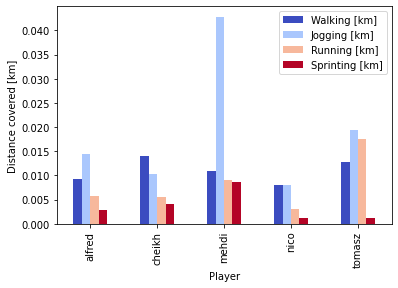

In [ ]:
# now calculate distance covered while: walking, joggings, running, sprinting
walking = []
jogging = []
running = []
sprinting = []
for player in home_summary.index:
    column = 'Speed_' + player
    # walking (less than 2 m/s)
    player_distance = revosTrackingData.loc[revosTrackingData[column] < 2, column].sum() / 24. / 1000
    walking.append( player_distance )
    # jogging (between 2 and 4 m/s)
    player_distance = revosTrackingData.loc[ (revosTrackingData[column] >= 2) & (revosTrackingData[column] < 4), column].sum() / 24. / 1000
    jogging.append( player_distance )
    # running (between 4 and 7 m/s)
    player_distance = revosTrackingData.loc[ (revosTrackingData[column] >= 4) & (revosTrackingData[column] < 7), column].sum() / 24. / 1000
    running.append( player_distance )
    # sprinting (greater than 7 m/s)
    player_distance = revosTrackingData.loc[ revosTrackingData[column] >= 7, column].sum() / 24. / 1000
    sprinting.append( player_distance )
    
home_summary['Walking [km]'] = walking
home_summary['Jogging [km]'] = jogging
home_summary['Running [km]'] = running
home_summary['Sprinting [km]'] = sprinting

# make a clustered bar chart of distance covered for each player at each speed
ax = home_summary[['Walking [km]','Jogging [km]','Running [km]','Sprinting [km]']].plot.bar(colormap='coolwarm')
ax.set_xlabel('Player')
ax.set_ylabel('Distance covered [km]')

## Plot des sprints

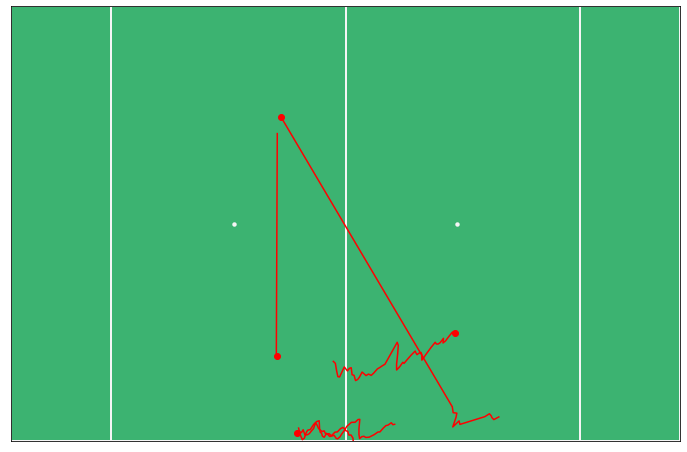

In [ ]:
# sustained sprints: how many sustained sprints per match did each player complete? Defined as maintaining a speed > 7 m/s for at least 1 second
nsprints = []
sprint_threshold = 2 # minimum speed to be defined as a sprint (m/s)
sprint_window = 1 * 24 # minimum duration sprint should be sustained (in this case, 1 second = 24 consecutive frames)
for player in home_summary.index:
    column = 'Speed_' + player
    # trick here is to convolve speed with a window of size 'sprint_window', and find number of occassions that sprint was sustained for at least one window length
    # diff helps us to identify when the window starts
    player_sprints = np.diff( 1*( np.convolve( 1*(revosTrackingData[column]>=sprint_threshold), np.ones(sprint_window), mode='same' ) >= sprint_window ) )
    nsprints.append( np.sum( player_sprints == 1 ) )
home_summary['# sprints'] = nsprints

# Plot the trajectories for each of player 10's sprints
player = 'mehdi'
column = 'Speed_' + player # speed
column_x = 'X_' + player # x position
column_y = 'Y_' + player # y position
# same trick as before to find start and end indices of windows of size 'sprint_window' in which player speed was above the sprint_threshold
player_sprints = np.diff( 1*( np.convolve( 1*(revosTrackingData[column]>=sprint_threshold), np.ones(sprint_window), mode='same' ) >= sprint_window ) )
player_sprints_start = np.where( player_sprints == 1 )[0] - int(sprint_window/2) + 1 # adding sprint_window/2 because of the way that the convolution is centred
player_sprints_end = np.where( player_sprints == -1 )[0] + int(sprint_window/2) + 1
# now plot all the sprints
fig,ax = plot_pitch()
for s,e in zip(player_sprints_start,player_sprints_end):
    ax.plot(revosTrackingData[column_x].iloc[s],revosTrackingData[column_y].iloc[s],'ro')
    ax.plot(revosTrackingData[column_x].iloc[s:e+1],revosTrackingData[column_y].iloc[s:e+1],'r')

# Test

## Visualisation

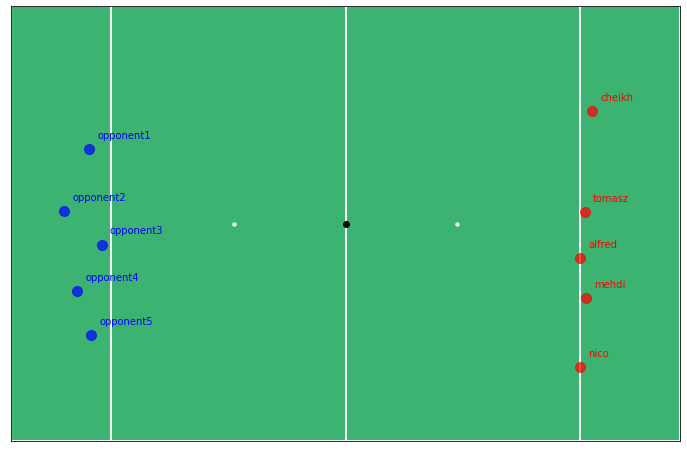

In [ ]:
# Test pour la frame 3 (début du point)
fig, ax = plot_frame(revosTrackingData.loc[0], opponentTrackingData.loc[0], annotate = True)

## EPV

In [ ]:
# Traçage de l'EPV
plot_EPV(EPV, field_dimen = (40., 20.), attack_direction = -1)

## Clip vidéo

In [ ]:
# Making a movie of the point
save_match_clip(revosTrackingData.loc[0:874], opponentTrackingData.loc[0:874], fpath = './', fname = 'clip_test', include_player_velocities = False)

Generating movie...done


## Vitesses

In [ ]:
revosTrackingData = calc_player_velocities(revosTrackingData, smoothing = True)
opponentTrackingData = calc_player_velocities(opponentTrackingData, smoothing = True)

# plot a random frame, plotting the player velocities using quivers
plot_frame(revosTrackingData.loc[100], opponentTrackingData.loc[100], include_player_velocities = True, annotate = True)

Frame        Time  ...  Vy_opponent5  Speed_opponent5
count  875.000000  875.000000  ...    734.000000       734.000000
mean   440.000000   18.333333  ...      0.249193         1.155153
std    252.735039   10.530627  ...      1.413433         1.493629
min      3.000000    0.125000  ...     -3.163059         0.000000
25%    221.500000    9.229167  ...      0.000000         0.000000
50%    440.000000   18.333333  ...      0.000000         0.160238
75%    658.500000   27.437500  ...      0.333174         2.470193
max    877.000000   36.541667  ...      4.606798         6.604140

[8 rows x 27 columns]

## Pitch Control

(<Figure size 864x576 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f407ea710b8>)

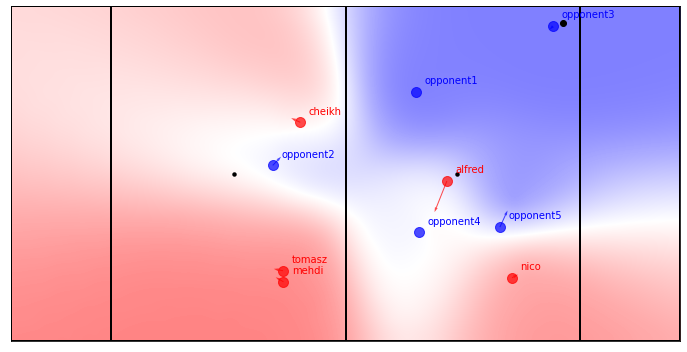

In [ ]:
# first get pitch control model parameters
params = default_model_params()

# evaluated pitch control surface for first pass
PPCF, xgrid, ygrid = generate_pitch_control_for_event(240, revosTrackingData, opponentTrackingData, params, frisbee_position = (13., 9.), pass_team = 'Home')
plot_pitchcontrol_for_event(240, revosTrackingData, opponentTrackingData, PPCF, frisbee_position = (13., 9.), pass_team = 'Home', annotate = True)

## EPV

(<Figure size 864x576 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f407e315128>)

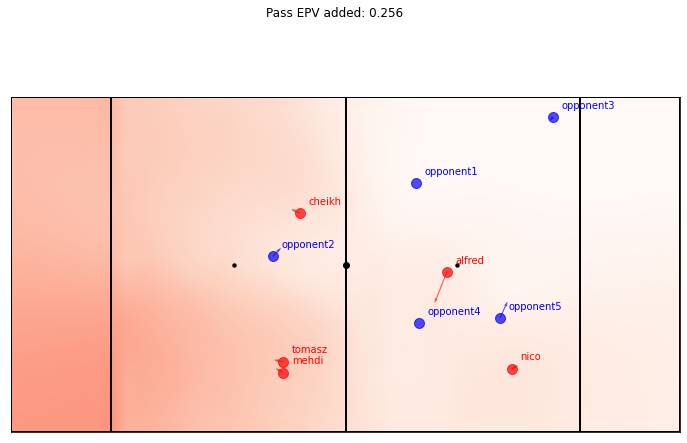

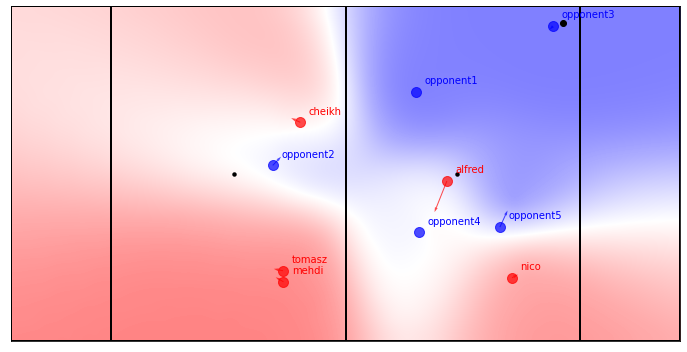

In [ ]:
# Calculate value-added for assist and plot expected value surface
frame = 240
EEPV_added, EPV_diff = calculate_epv_added(frame, revosTrackingData, opponentTrackingData, EPV, params, frisbee_start_pos = (13., 9.), frisbee_target_pos = (17., 0.))
PPCF, xgrid, ygrid = generate_pitch_control_for_event(frame, revosTrackingData, opponentTrackingData, params, frisbee_position = (13., 9.))
fig, ax = plot_EPV_for_event(frame, revosTrackingData, opponentTrackingData, PPCF, EPV, annotate = True, autoscale = True )
fig.suptitle('Pass EPV added: %1.3f' % EEPV_added, y = 0.95)
plot_pitchcontrol_for_event(frame, revosTrackingData, opponentTrackingData, PPCF, frisbee_position = (13., 9.), annotate=True)

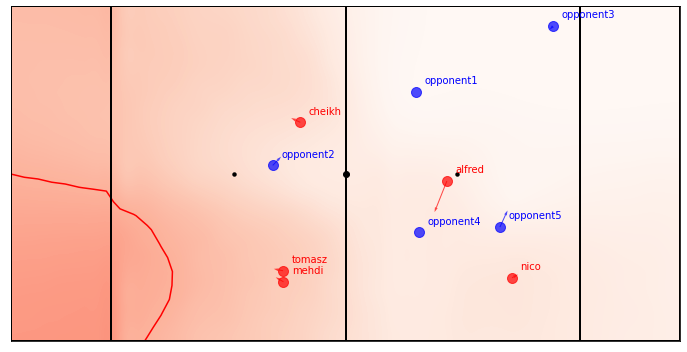

In [ ]:
# Calculate value-added for assist and plot expected value surface
frame = 240
PPCF, xgrid, ygrid = generate_pitch_control_for_event(frame, revosTrackingData, opponentTrackingData, params, frisbee_position = (13., 9.))
fig, ax = plot_EPV_for_event(frame, revosTrackingData, opponentTrackingData, PPCF, EPV, annotate = True, autoscale = True, contours = True)

# To Do

In [ ]:
# Fonction Plot Events (Viz)
# Fonction remove player velocities ?
# Fonction find_max_value_added_target (EPV)
# Améliorer EPV grid
# Résoudre le problème d'ID switching